In [113]:
import pandas as pd

# 读取数据
data_2022 = pd.read_csv('./mnt/data/2022年旅客运输量月度数据.csv', encoding='gbk')
data_2023 = pd.read_csv('./mnt/data/2023年旅客运输量月度数据.csv', encoding='gbk')

# 检查数据前几行
print("2022年数据预览:")
print(data_2022.head())

print("\n2023年数据预览:")
print(data_2023.head())

# 检查数据的基本信息
print("\n2022年数据基本信息:")
print(data_2022.info())

print("\n2023年数据基本信息:")
print(data_2023.info())


2022年数据预览:
             指标  2022年12月  2022年11月  2022年10月   2022年9月   2022年8月   2022年7月  \
0    客运量当期值(万人)   36123.0   33481.0   42794.0   48413.0   59623.0   61900.0   
1    客运量累计值(万人)  558738.0  522618.0  489136.0  446342.0  397640.0  338017.0   
2    客运量同比增长(%)     -37.3     -38.0     -41.2     -28.7       8.6     -25.8   
3    客运量累计增长(%)     -32.7     -32.4     -32.0     -30.9     -31.2     -35.5   
4  铁路客运量当期值(万人)    9913.0    7374.0   11896.0   14752.0   21732.0   22615.0   

    2022年6月   2022年5月   2022年4月   2022年3月   2022年2月  2022年1月  
0   51605.0   37782.0   32506.0   42108.0   56582.0  55534.0  
1  276117.0  224512.0  186730.0  154224.0  112116.0  55534.0  
2     -31.4     -55.5     -59.7     -43.5      -1.3    -17.3  
3     -37.2     -38.4     -33.2     -22.5      -9.9    -17.3  
4   16736.0    9225.0    5691.0   10145.0   19052.0  17874.0  

2023年数据预览:
             指标  2023年12月  2023年11月  2023年10月   2023年9月   2023年8月   2023年7月  \
0    客运量当期值(万人)   73965.0   74495.0   85182.0

#### 数据预处理

In [114]:
# 转置数据框，使月份成为行
data_2022 = data_2022.set_index('指标').T.reset_index().rename(columns={'index': '月份'})
data_2023 = data_2023.set_index('指标').T.reset_index().rename(columns={'index': '月份'})

# 添加年份列
data_2022['年份'] = '2022年'
data_2023['年份'] = '2023年'

# 合并数据
data_combined = pd.concat([data_2022, data_2023], ignore_index=True)

# 转换月份列为datetime类型，并提取季度信息
data_combined['月份'] = pd.to_datetime(data_combined['月份'], format='%Y年%m月')
data_combined['季度'] = data_combined['月份'].dt.quarter
# 显示合并后的数据
data_combined.head(24)


指标,月份,客运量当期值(万人),客运量累计值(万人),客运量同比增长(%),客运量累计增长(%),铁路客运量当期值(万人),铁路客运量累计值(万人),铁路客运量同比增长(%),铁路客运量累计增长(%),公路客运量当期值(万人),...,水运客运量当期值(万人),水运客运量累计值(万人),水运客运量同比增长(%),水运客运量累计增长(%),民航客运量当期值(万人),民航客运量累计值(万人),民航客运量同比增长(%),民航客运量累计增长(%),年份,季度
0,2022-12-01,36123.0,558738.0,-37.3,-32.7,9913.0,167296.0,-39.9,-35.9,23771.0,...,568.0,11627.0,-32.4,-28.8,1871.0,25171.0,-30.9,-42.9,2022年,4
1,2022-11-01,33481.0,522618.0,-38.0,-32.4,7374.0,157383.0,-48.8,-35.7,24146.0,...,704.0,11060.0,-27.4,-28.6,1257.0,23303.0,-41.6,-43.6,2022年,4
2,2022-10-01,42794.0,489136.0,-41.2,-32.0,11896.0,150008.0,-52.0,-34.9,28147.0,...,1159.0,10356.0,-30.5,-28.7,1592.0,22046.0,-59.0,-43.8,2022年,4
3,2022-09-01,48413.0,446342.0,-28.7,-30.9,14752.0,138113.0,-35.0,-32.8,30700.0,...,950.0,9197.0,-13.8,-28.5,2010.0,20453.0,-44.4,-42.1,2022年,3
4,2022-08-01,59623.0,397640.0,8.6,-31.2,21732.0,123071.0,41.0,-32.7,32890.0,...,1770.0,8246.0,74.9,-29.9,3230.0,18443.0,44.2,-41.8,2022年,3
5,2022-07-01,61900.0,338017.0,-25.8,-35.5,22615.0,101339.0,-26.7,-39.5,34184.0,...,1701.0,6477.0,-12.5,-39.7,3400.0,15213.0,-30.8,-48.4,2022年,3
6,2022-06-01,51605.0,276117.0,-31.4,-37.2,16736.0,78724.0,-32.0,-42.3,31637.0,...,1032.0,4775.0,-31.5,-45.7,2200.0,11813.0,-46.7,-51.9,2022年,2
7,2022-05-01,37782.0,224512.0,-55.5,-38.4,9225.0,61988.0,-68.6,-44.6,26686.0,...,664.0,3743.0,-69.1,-48.7,1207.0,9613.0,-76.4,-52.9,2022年,2
8,2022-04-01,32506.0,186730.0,-59.7,-33.2,5691.0,52763.0,-79.8,-36.1,25595.0,...,432.0,3079.0,-76.2,-40.2,788.0,8406.0,-84.6,-45.1,2022年,2
9,2022-03-01,42108.0,154224.0,-43.5,-22.5,10145.0,47072.0,-58.4,-13.5,29759.0,...,667.0,2647.0,-48.7,-20.6,1537.0,7618.0,-67.9,-25.3,2022年,1


#### 年度分析
分析2022年和2023年每个月的旅客运输量变化趋势，并计算年度总变化量。

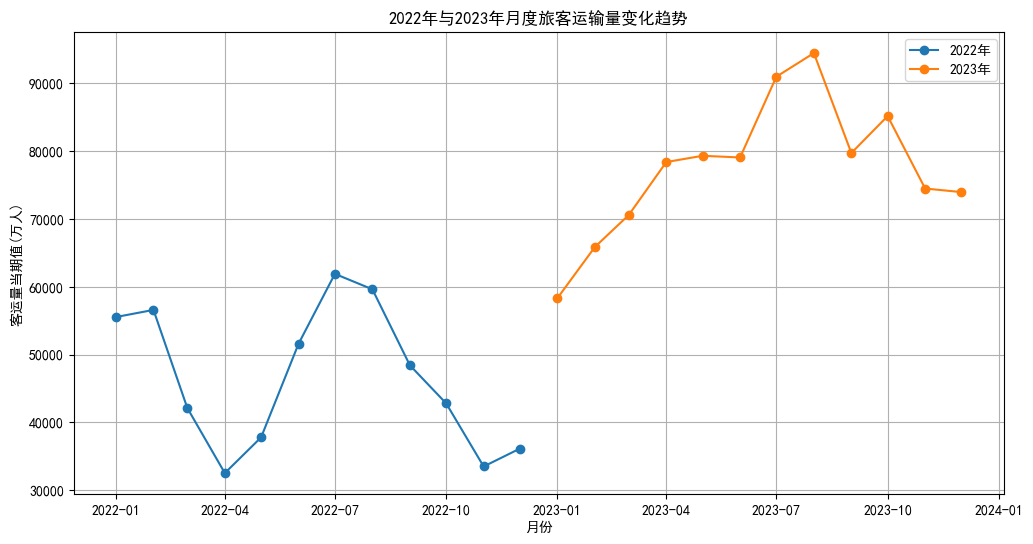

(558451.0, 930429.0)

In [115]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 提取所需数据
monthly_data_2022 = data_combined[data_combined['年份'] == '2022年'][['月份', '客运量当期值(万人)']]
monthly_data_2023 = data_combined[data_combined['年份'] == '2023年'][['月份', '客运量当期值(万人)']]

# 按月份排序
monthly_data_2022.sort_values('月份', inplace=True)
monthly_data_2023.sort_values('月份', inplace=True)

# 年度总变化量计算
total_change_2022 = monthly_data_2022['客运量当期值(万人)'].sum()
total_change_2023 = monthly_data_2023['客运量当期值(万人)'].sum()

# 绘制变化趋势图
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_2022['月份'], monthly_data_2022['客运量当期值(万人)'], marker='o', label='2022年')
plt.plot(monthly_data_2023['月份'], monthly_data_2023['客运量当期值(万人)'], marker='o', label='2023年')
plt.title('2022年与2023年月度旅客运输量变化趋势')
plt.xlabel('月份')
plt.ylabel('客运量当期值(万人)')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/monthly_passenger_trend.png')
plt.show()

total_change_2022, total_change_2023

#### 月度分析
将比较每年各月的旅客运输量变化趋势，找出每年的高峰和低谷月份，并分析可能的原因。

In [116]:
# 准备数据
monthly_data_2022 = data_combined[data_combined['年份'] == '2022年'][['月份', '客运量当期值(万人)']]
monthly_data_2023 = data_combined[data_combined['年份'] == '2023年'][['月份', '客运量当期值(万人)']]

# 按月份排序
monthly_data_2022.sort_values('月份', inplace=True)
monthly_data_2023.sort_values('月份', inplace=True)

# 计算每年的高峰和低谷月份
peak_month_2022 = monthly_data_2022.loc[monthly_data_2022['客运量当期值(万人)'].idxmax(), '月份']
valley_month_2022 = monthly_data_2022.loc[monthly_data_2022['客运量当期值(万人)'].idxmin(), '月份']

peak_month_2023 = monthly_data_2023.loc[monthly_data_2023['客运量当期值(万人)'].idxmax(), '月份']
valley_month_2023 = monthly_data_2023.loc[monthly_data_2023['客运量当期值(万人)'].idxmin(), '月份']

# 将日期转换为字符串格式
peak_month_2022_str = peak_month_2022.strftime('%Y年%m月')
valley_month_2022_str = valley_month_2022.strftime('%Y年%m月')
peak_month_2023_str = peak_month_2023.strftime('%Y年%m月')
valley_month_2023_str = valley_month_2023.strftime('%Y年%m月')

# 输出结果
print(f"2022年高峰月份: {peak_month_2022_str}, 低谷月份: {valley_month_2022_str}")
print(f"2023年高峰月份: {peak_month_2023_str}, 低谷月份: {valley_month_2023_str}")


2022年高峰月份: 2022年07月, 低谷月份: 2022年04月
2023年高峰月份: 2023年08月, 低谷月份: 2023年01月


#### 同比增长
分析每个月的同比增长情况，找出增长最快和最慢的月份，了解运输量变化的季节性因素或外部影响。

In [117]:
# 提取同比增长数据
yoy_growth_2022 = data_combined[(data_combined['年份'] == '2022年') & (data_combined['月份'] != '2022年12月')]['客运量同比增长(%)']
yoy_growth_2023 = data_combined[(data_combined['年份'] == '2023年') & (data_combined['月份'] != '2023年12月')]['客运量同比增长(%)']

# 计算增长最快和最慢的月份
fastest_growth_month_2022 = monthly_data_2022.loc[yoy_growth_2022.idxmax(), '月份']
slowest_growth_month_2022 = monthly_data_2022.loc[yoy_growth_2022.idxmin(), '月份']

fastest_growth_month_2023 = monthly_data_2023.loc[yoy_growth_2023.idxmax(), '月份']
slowest_growth_month_2023 = monthly_data_2023.loc[yoy_growth_2023.idxmin(), '月份']

# 将日期转换为字符串格式
fastest_growth_month_2022_str = fastest_growth_month_2022.strftime('%Y年%m月')
slowest_growth_month_2022_str = slowest_growth_month_2022.strftime('%Y年%m月')
fastest_growth_month_2023_str = fastest_growth_month_2023.strftime('%Y年%m月')
slowest_growth_month_2023_str = slowest_growth_month_2023.strftime('%Y年%m月')

# 输出结果
print(f"2022年同比增长最快的月份: {fastest_growth_month_2022_str}, 同比增长最慢的月份: {slowest_growth_month_2022_str}")
print(f"2023年同比增长最快的月份: {fastest_growth_month_2023_str}, 同比增长最慢的月份: {slowest_growth_month_2023_str}")


2022年同比增长最快的月份: 2022年08月, 同比增长最慢的月份: 2022年04月
2023年同比增长最快的月份: 2023年04月, 同比增长最慢的月份: 2023年01月


C:\Users\jionm\AppData\Local\Temp\ipykernel_12556\680709713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoy_growth['月份编号'] = yoy_growth['月份'].dt.month


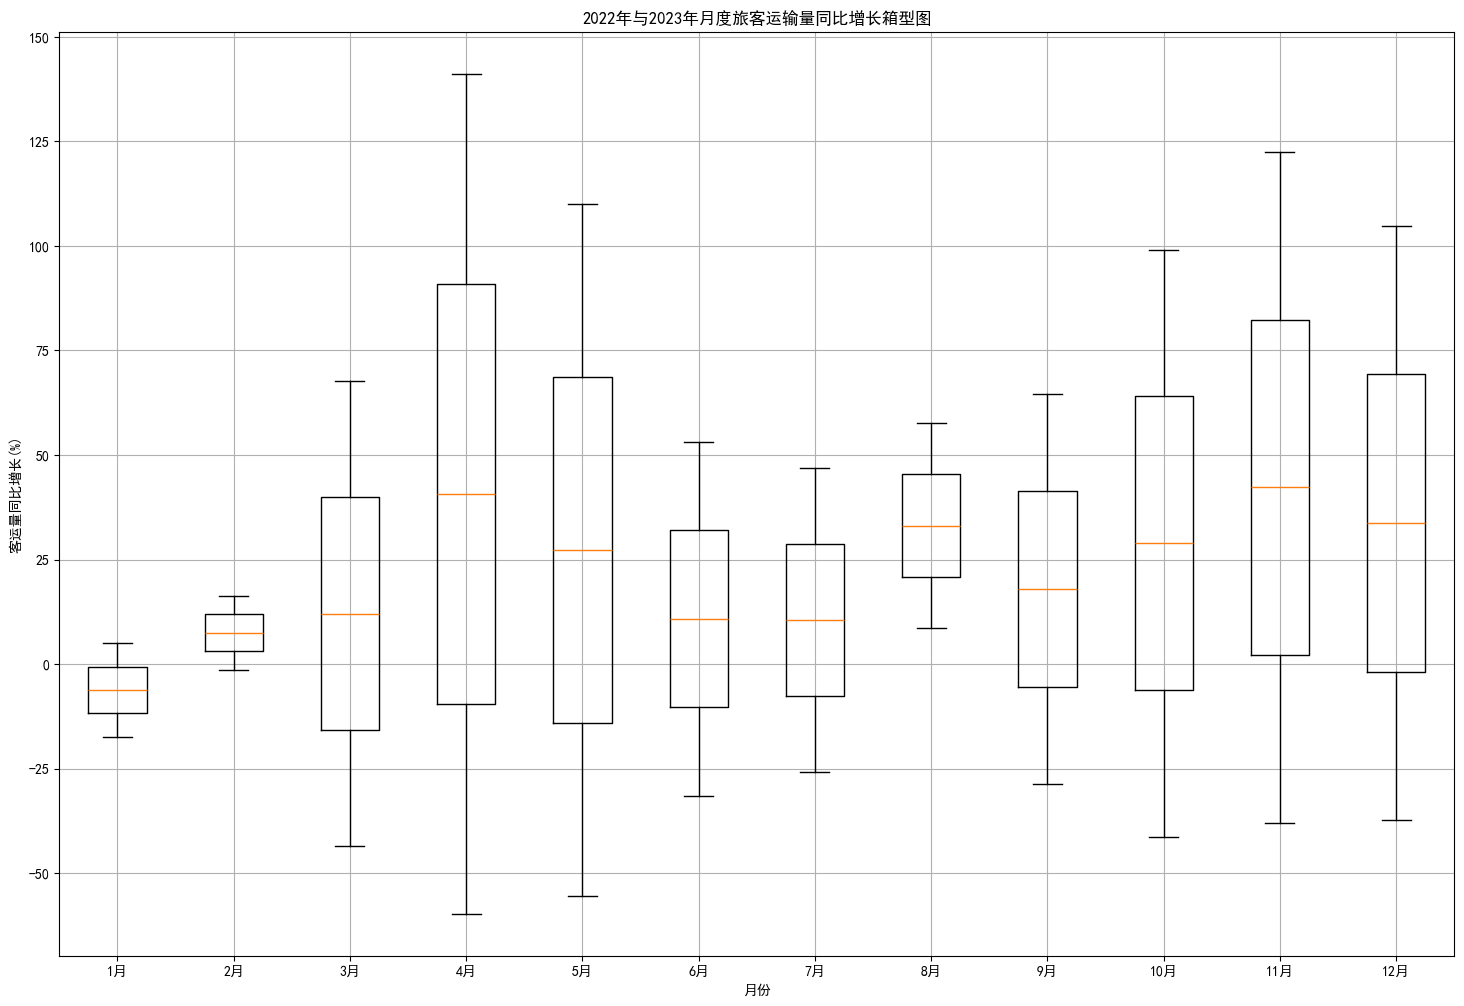

In [118]:
# 重新定义yoy_growth变量
yoy_growth = data_combined[['月份', '年份', '客运量同比增长(%)']]
yoy_growth['月份编号'] = yoy_growth['月份'].dt.month

# 绘制每个月的箱型图
plt.figure(figsize=(18, 12))
plt.boxplot([yoy_growth[yoy_growth['月份编号'] == i]['客运量同比增长(%)'].dropna() for i in range(1, 13)], labels=[f'{i}月' for i in range(1, 13)])
plt.title('2022年与2023年月度旅客运输量同比增长箱型图')
plt.xlabel('月份')
plt.ylabel('客运量同比增长(%)')
plt.grid(True)
plt.savefig('./mnt/data/yoy_growth_monthly_boxplot.png')
plt.show()

#### 累计增长
计算并比较每年的累计增长情况，了解整体的年度增长趋势。

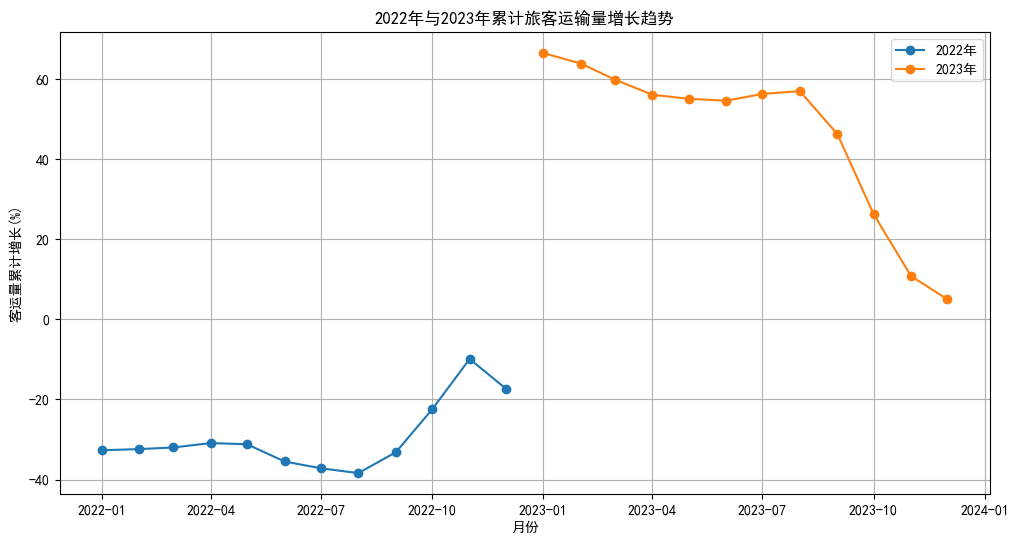

In [119]:
# 提取累计增长数据
cumulative_growth_2022 = data_combined[(data_combined['年份'] == '2022年')]['客运量累计增长(%)']
cumulative_growth_2023 = data_combined[(data_combined['年份'] == '2023年')]['客运量累计增长(%)']

# 绘制累计增长趋势图
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_2022['月份'], cumulative_growth_2022, marker='o', label='2022年')
plt.plot(monthly_data_2023['月份'], cumulative_growth_2023, marker='o', label='2023年')
plt.title('2022年与2023年累计旅客运输量增长趋势')
plt.xlabel('月份')
plt.ylabel('客运量累计增长(%)')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/cumulative_growth_trend.png')
plt.show()


#### 运输方法分析
将铁路客运量与总客运量进行对比，分析铁路运输在总运输量中的占比及其变化。

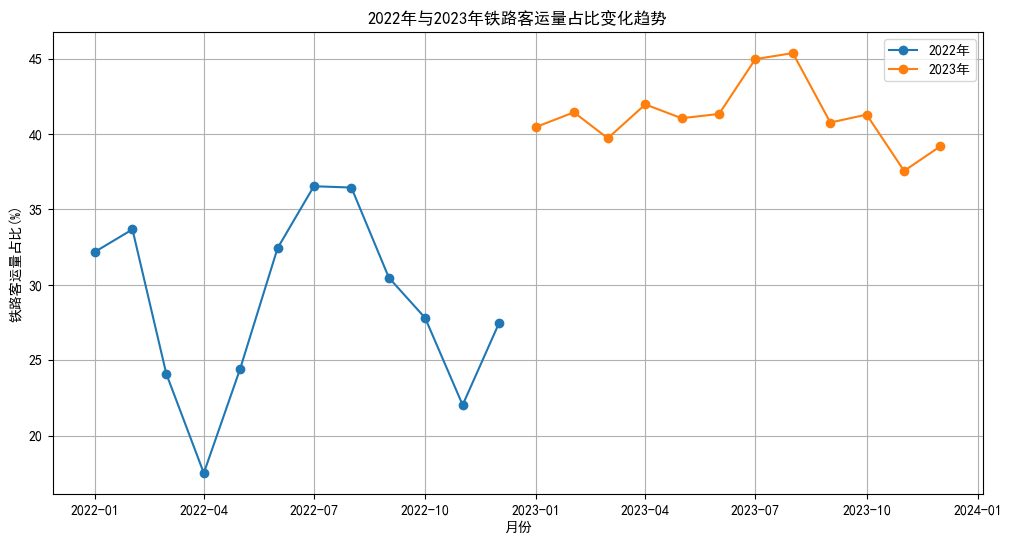

In [120]:
# 计算铁路客运量占比
data_combined['铁路客运量占比(%)'] = (data_combined['铁路客运量当期值(万人)'] / data_combined['客运量当期值(万人)']) * 100

# 绘制铁路客运量占比变化趋势图
plt.figure(figsize=(12, 6))
for year in ['2022年', '2023年']:
    yearly_data = data_combined[data_combined['年份'] == year]
    plt.plot(yearly_data['月份'], yearly_data['铁路客运量占比(%)'], marker='o', label=year)

plt.title('2022年与2023年铁路客运量占比变化趋势')
plt.xlabel('月份')
plt.ylabel('铁路客运量占比(%)')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/railway_passenger_ratio_trend.png')
plt.show()


#### 季节性分析
将分析每年的季度运输量变化，了解不同季节对运输量的影响，找出季节性高峰和低谷。

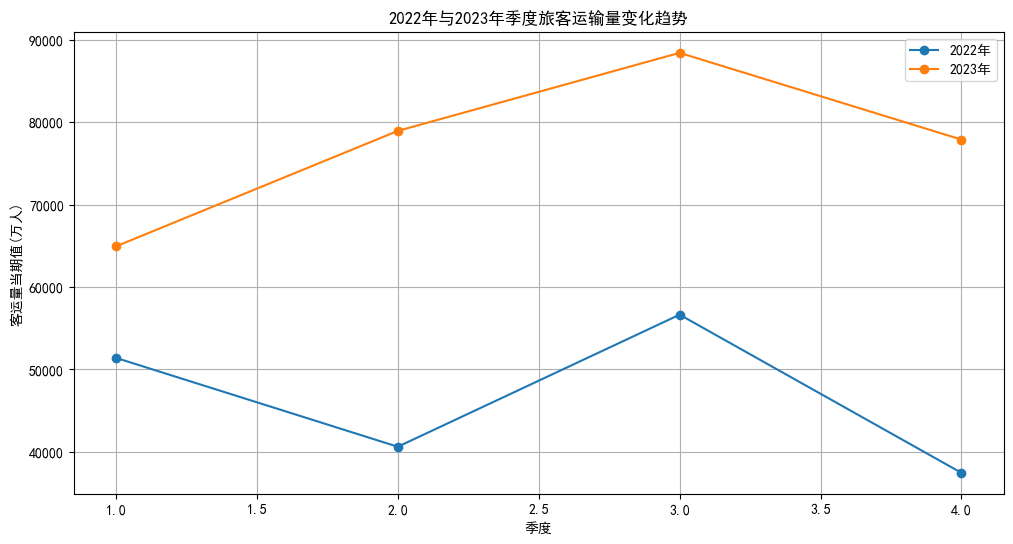

In [121]:
# 转换客运量当期值列为数值类型
data_combined['客运量当期值(万人)'] = pd.to_numeric(data_combined['客运量当期值(万人)'], errors='coerce')

# 计算每个季度的客运量平均值
quarterly_data_2022 = data_combined[data_combined['年份'] == '2022年'].groupby('季度')['客运量当期值(万人)'].mean()
quarterly_data_2023 = data_combined[data_combined['年份'] == '2023年'].groupby('季度')['客运量当期值(万人)'].mean()

# 绘制季度运输量变化趋势图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(quarterly_data_2022.index, quarterly_data_2022.values, marker='o', label='2022年')
plt.plot(quarterly_data_2023.index, quarterly_data_2023.values, marker='o', label='2023年')
plt.title('2022年与2023年季度旅客运输量变化趋势')
plt.xlabel('季度')
plt.ylabel('客运量当期值(万人)')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/quarterly_passenger_volume_trend.png')
plt.show()

#### 影响因素分析
结合外部数据（如假期、特殊事件等），分析这些因素对旅客运输量的影响。例如春节、国庆节等假期对运输量的影响。这里假设我们已经有了假期数据。

In [122]:
# 创建假期数据
holidays = {
    '春节': ['2022-02', '2023-01'],
    '国庆节': ['2022-10', '2023-10'],
}

# 标记假期月份
data_combined['假期'] = data_combined['月份'].dt.strftime('%Y-%m').apply(
    lambda x: next((holiday for holiday, dates in holidays.items() if x in dates), None))

# 计算假期与非假期月份的平均客运量
holiday_data = data_combined[data_combined['假期'].notna()].groupby('假期')['客运量当期值(万人)'].mean()
non_holiday_data = data_combined[data_combined['假期'].isna()].groupby('年份')['客运量当期值(万人)'].mean()

holiday_data, non_holiday_data


(假期
 国庆节    63988.0
 春节     57454.5
 Name: 客运量当期值(万人), dtype: float64,
 年份
 2022年    45907.5
 2023年    78692.0
 Name: 客运量当期值(万人), dtype: float64)

#### 预测分析
利用历史数据进行时间序列分析，预测未来几个月的旅客运输量，为决策提供参考。

D:\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


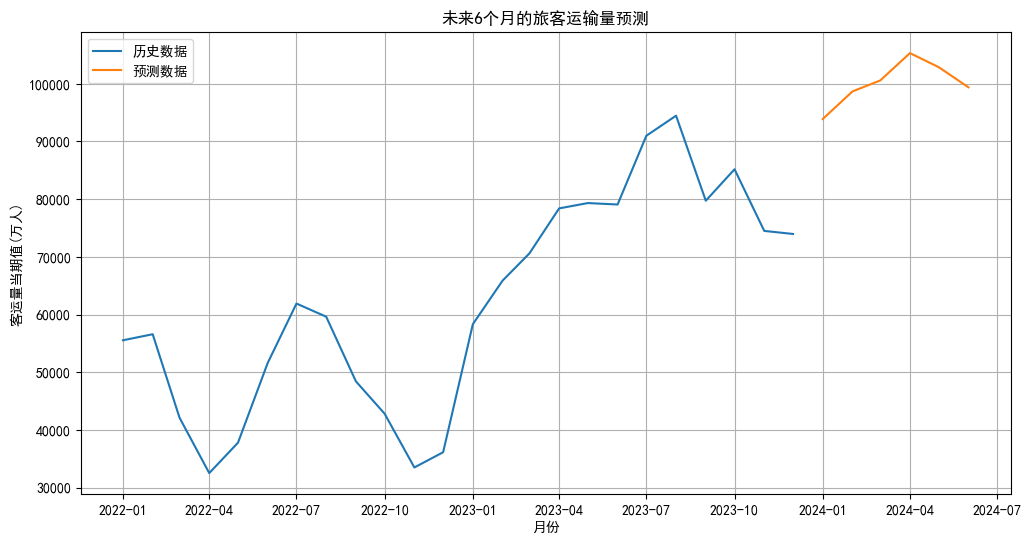

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 准备时间序列数据
ts_data = data_combined.set_index('月份')['客运量当期值(万人)'].sort_index()

# 确保时间序列数据具有正确的日期频率
ts_data.index = pd.DatetimeIndex(ts_data.index, freq='MS')

# 建立霍尔特-温特斯模型进行预测
model = ExponentialSmoothing(ts_data, seasonal='add', seasonal_periods=12).fit(optimized=True)
forecast = model.forecast(steps=6)

# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='历史数据')
plt.plot(forecast, label='预测数据')
plt.title('未来6个月的旅客运输量预测')
plt.xlabel('月份')
plt.ylabel('客运量当期值(万人)')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/forecast_passenger_volume.png')
plt.show()


#### 运输效率分析
分析每单位时间或每单位资源的运输量，评估运输系统的效率，找出优化空间。

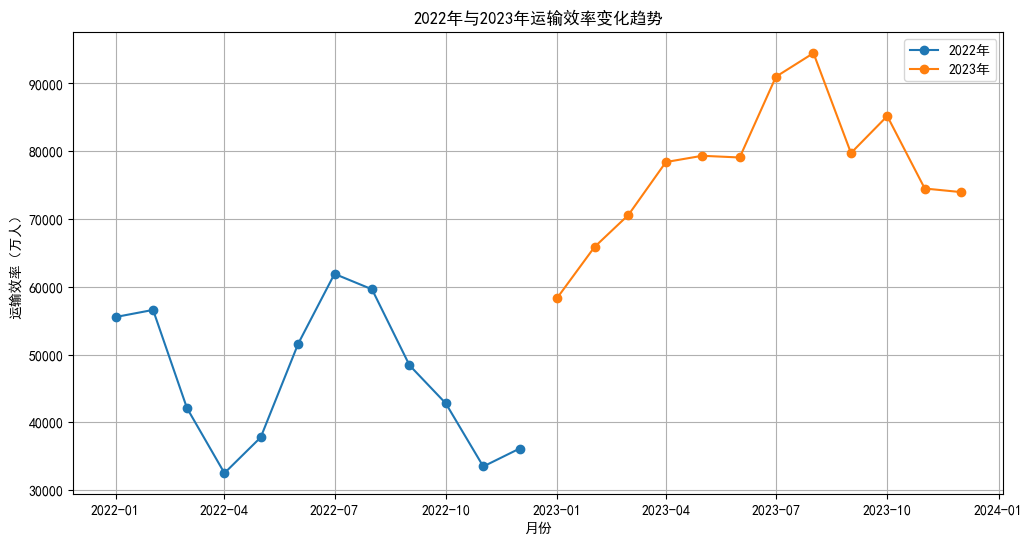

In [124]:
# 假设每个月的资源（例如列车数量）不变，可以用客运量当期值作为效率的直接衡量
data_combined['运输效率'] = data_combined['客运量当期值(万人)']  # 这里假设每单位资源不变

# 绘制运输效率变化趋势图
plt.figure(figsize=(12, 6))
for year in ['2022年', '2023年']:
    yearly_data = data_combined[data_combined['年份'] == year]
    plt.plot(yearly_data['月份'], yearly_data['运输效率'], marker='o', label=year)

plt.title('2022年与2023年运输效率变化趋势')
plt.xlabel('月份')
plt.ylabel('运输效率（万人）')
plt.legend()
plt.grid(True)
plt.savefig('./mnt/data/transport_efficiency_trend.png')
plt.show()


#### 异常检测
通过统计方法或机器学习模型，检测运输量数据中的异常值，找出异常的月份或事件，并分析原因。

In [125]:
from scipy import stats

# 使用Z-score进行异常检测
data_combined['z_score'] = stats.zscore(data_combined['客运量当期值(万人)'])

# 标记异常值
data_combined['异常'] = data_combined['z_score'].apply(lambda x: '异常' if abs(x) > 2 else '正常')

# 找出异常值
anomalies = data_combined[data_combined['异常'] == '异常']

anomalies


指标,月份,客运量当期值(万人),客运量累计值(万人),客运量同比增长(%),客运量累计增长(%),铁路客运量当期值(万人),铁路客运量累计值(万人),铁路客运量同比增长(%),铁路客运量累计增长(%),公路客运量当期值(万人),...,民航客运量累计值(万人),民航客运量同比增长(%),民航客运量累计增长(%),年份,季度,铁路客运量占比(%),假期,运输效率,z_score,异常


#### 聚类分析
使用K-means聚类算法对不同月份的旅客运输量进行聚类。

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


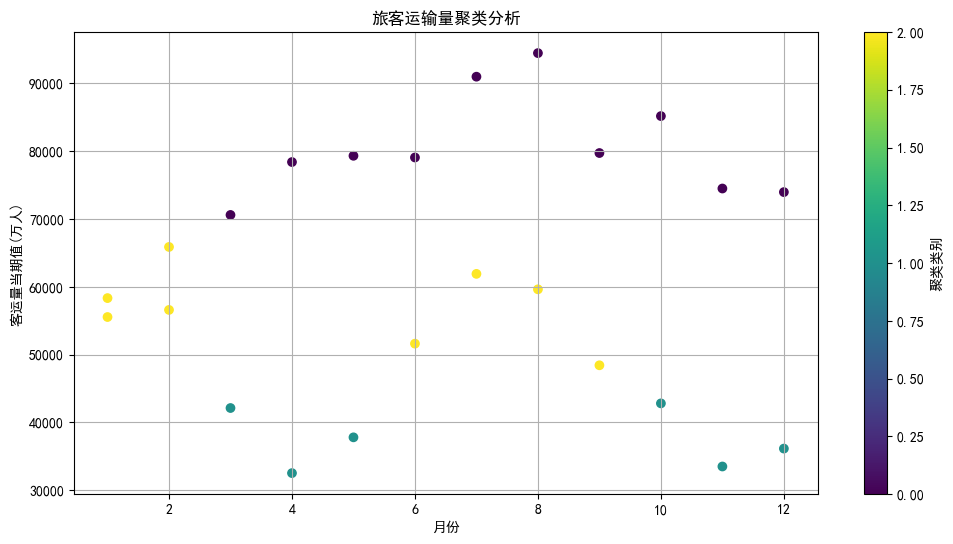

In [126]:
from sklearn.cluster import KMeans
import numpy as np


# 准备数据
monthly_data = data_combined[['月份', '客运量当期值(万人)']].copy()
monthly_data['月份编号'] = monthly_data['月份'].dt.month

# 转换为适合聚类分析的格式
X = monthly_data[['月份编号', '客运量当期值(万人)']].values

# 使用K-means聚类算法，明确指定n_init参数
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X)

# 添加聚类结果到原数据
monthly_data['聚类结果'] = kmeans.labels_

# 绘制聚类结果
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['月份编号'], monthly_data['客运量当期值(万人)'], c=monthly_data['聚类结果'], cmap='viridis')
plt.title('旅客运输量聚类分析')
plt.xlabel('月份')
plt.ylabel('客运量当期值(万人)')
plt.colorbar(label='聚类类别')
plt.grid(True)
plt.savefig('./mnt/data/passenger_volume_clustering_updated.png')
plt.show()

# 保存聚类结果
monthly_data.to_csv('./mnt/data/monthly_data_with_clusters.csv', index=False)



#### 数据准备和划分

In [127]:
from sklearn.model_selection import train_test_split

# 准备数据
data_combined['月份编号'] = data_combined['月份'].dt.month
X = data_combined[['月份编号', '年份']]
X = pd.get_dummies(X, columns=['年份'], drop_first=True)
y = data_combined['客运量当期值(万人)']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), X_test.head(), y_train.head(), y_test.head()


(    月份编号  年份_2023年
 9      3     False
 13    11      True
 1     11     False
 21     3      True
 5      7     False,
     月份编号  年份_2023年
 8      4     False
 16     8      True
 0     12     False
 18     6      True
 11     1     False,
 9     42108.0
 13    74495.0
 1     33481.0
 21    70595.0
 5     61900.0
 Name: 客运量当期值(万人), dtype: float64,
 8     32506.0
 16    94474.0
 0     36123.0
 18    79073.0
 11    55534.0
 Name: 客运量当期值(万人), dtype: float64)

#### 建模

In [128]:
from sklearn.linear_model import LinearRegression

# 建立线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### 模型评价

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

# 预测
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 计算评价指标
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train, mse_test, r2_train, r2_test


(79805588.0328582, 173975329.63764313, 0.7053426156852609, 0.6997488590524115)